In [1]:
import pandas as pd
import geopandas as gd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
import rasterio
import rasterio.warp
from rasterio import features
import shapely.geometry
import shapely
import seaborn as sn

In [2]:
os.chdir('/projects/canis/eoc_feature_corr')

In [3]:
grid_path = "./data/by_state/WV/wv_extent_coverage.shp"
grid = gd.read_file(grid_path)
grid = grid.set_index('id')

In [4]:
feature_path = './data/cover/landforms_10classes_30m_dd83_3857.tiff'

feature_file = rasterio.open(feature_path)
feature_raster = feature_file.read(1)

In [5]:
grid['centroid'] = grid['geometry'].centroid
grid = grid.set_geometry('centroid')
grid['feature'] = grid['centroid'].map(lambda coords: next(feature_file.sample(coords.coords, indexes=1))[0])
grid = grid.set_geometry('geometry')
grid = grid.drop('centroid', axis=1)
grid

,left,top,right,bottom,med_rxpwr,chg_covera,verizon_co,geometry,feature
id,,,,,,,,,
231.0,-9.152446e+06,4.595449e+06,-9.151446e+06,4.594449e+06,-120.000,0,0,"POLYGON ((-9152445.857 4595449.221, -9151445.8...",7
241.0,-9.152446e+06,4.585449e+06,-9.151446e+06,4.584449e+06,-120.000,0,0,"POLYGON ((-9152445.857 4585449.221, -9151445.8...",7
579.0,-9.151446e+06,4.596449e+06,-9.150446e+06,4.595449e+06,-120.000,0,1,"POLYGON ((-9151445.857 4596449.221, -9150445.8...",7
590.0,-9.151446e+06,4.585449e+06,-9.150446e+06,4.584449e+06,-120.000,0,0,"POLYGON ((-9151445.857 4585449.221, -9150445.8...",7
591.0,-9.151446e+06,4.584449e+06,-9.150446e+06,4.583449e+06,-120.000,0,0,"POLYGON ((-9151445.857 4584449.221, -9150445.8...",10
...,...,...,...,...,...,...,...,...,...
173860.0,-8.654446e+06,4.768449e+06,-8.653446e+06,4.767449e+06,-107.930,1,1,"POLYGON ((-8654445.857 4768449.221, -8653445.8...",10
173861.0,-8.654446e+06,4.767449e+06,-8.653446e+06,4.766449e+06,-108.075,1,1,"POLYGON ((-8654445.857 4767449.221, -8653445.8...",8
174209.0,-8.653446e+06,4.768449e+06,-8.652446e+06,4.767449e+06,-102.595,1,1,"POLYGON ((-8653445.857 4768449.221, -8652445.8...",8


In [6]:
grid['agreement'] = grid['chg_covera'] == grid['verizon_co']

In [7]:
sn.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

In [8]:
confusion_matrix = pd.crosstab( grid['feature'],grid['agreement'], rownames=['Form Type'], colnames=['Agreement'], normalize='index')
print (confusion_matrix)

Agreement     False     True 
Form Type                    
1          0.400000  0.600000
2          0.357143  0.642857
3          0.441441  0.558559
4          0.461538  0.538462
6          0.486936  0.513064
7          0.542714  0.457286
8          0.513577  0.486423
10         0.411120  0.588880


In [9]:
confusion_matrix['Total'] = grid.groupby('feature').count()['agreement']

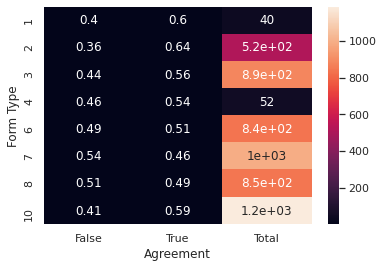

In [10]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()

Agreement   False  True   All
Cover Type                   
1              16    24    40
2             185   333   518
3             392   496   888
4              24    28    52
6             410   432   842
7             540   455   995
8             435   412   847
10            488   699  1187
All          2490  2879  5369


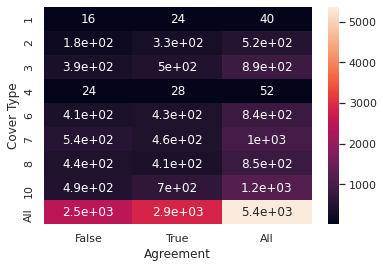

In [11]:
confusion_matrix = pd.crosstab( grid['feature'],grid['agreement'], rownames=['Cover Type'], colnames=['Agreement'], margins=True)
print (confusion_matrix)
sn.heatmap(confusion_matrix, annot=True)
plt.show()